# Data preprocessing for classification

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_theme(style='darkgrid', palette='pastel')

In [148]:
# see raw data
raw_data = pd.read_excel('raw_data.xlsx')
raw_data.to_csv('raw_data.csv', index=None, header=True)

raw_data

,Reservoir Fluid,Sampling,Sourse,Well,Test,Fluid,"Tcrit, K","Pcrit, MPa","MM, g/mole","GOR, sM3/sM3",...,"Pressure, Mpa",Volume water%,Vapor,Liquid,Aqua,"dP, MPa","dt, K",Unnamed: 24,Unnamed: 25,Unnamed: 26
0,Параметр категоризации,Параметр категоризации,Не учитывать в анализе,Не учитывать в анализе,Не учитывать в анализе,Не учитывать в анализе,Параметр категоризации и интерполяции,Параметр категоризации и интерполяции,Параметр категоризации и интерполяции,Параметр категоризации и интерполяции,...,Цель программы - прогноз этого параметра,Входной параметр от пользователя,Цель программы - прогноз этой категории,Цель программы - прогноз этой категории,Цель программы - прогноз этой категории,Цель программы - прогноз этой категории,Цель программы - прогноз этой категории,NaN,NaN,NaN
1,Pure,Monophasic,PVTsim DataBase,-,-,C1,190.600006,4.600155,16.042879,Monophasic,...,99.999932,-,Vapor,-,-,0.000068,0,NaN,NaN,NaN
2,Pure,Monophasic,PVTsim DataBase,-,-,C1,190.600006,4.600155,16.042879,Monophasic,...,89.127627,-,Vapor,-,-,10.872373,30,NaN,NaN,`
3,Pure,Monophasic,PVTsim DataBase,-,-,C1,190.600006,4.600155,16.042879,Monophasic,...,81.801254,-,Vapor,-,-,18.198746,50,NaN,NaN,NaN
4,Pure,Monophasic,PVTsim DataBase,-,-,C1,190.600006,4.600155,16.042879,Monophasic,...,74.406412,-,Vapor,-,-,25.593588,70,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12146,Wet gas,Separator,PVTsim database,Sep Gas,PT1,WG1,222.21,7.452,19.85,Monophasic,...,22.858235,-,Vapor,-,-,-10.858235,-60,NaN,NaN,NaN
12147,Wet gas,Separator,PVTsim database,Sep Gas,PT1,WG1,222.21,7.452,19.85,Monophasic,...,19.293268,-,Vapor,-,-,-7.293268,-40,NaN,NaN,NaN
12148,Wet gas,Separator,PVTsim database,Sep Gas,PT1,WG1,222.21,7.452,19.85,Monophasic,...,15.675815,-,Vapor,-,-,-3.675815,-20,NaN,NaN,NaN
12149,Wet gas,Separator,PVTsim database,Sep Gas,PT1,WG1,222.21,7.452,19.85,Monophasic,...,13.84561,-,Vapor,-,-,-1.84561,-10,NaN,NaN,NaN


In [149]:
# delete a comment row
raw_data = raw_data.iloc[1:]

raw_data

,Reservoir Fluid,Sampling,Sourse,Well,Test,Fluid,"Tcrit, K","Pcrit, MPa","MM, g/mole","GOR, sM3/sM3",...,"Pressure, Mpa",Volume water%,Vapor,Liquid,Aqua,"dP, MPa","dt, K",Unnamed: 24,Unnamed: 25,Unnamed: 26
1,Pure,Monophasic,PVTsim DataBase,-,-,C1,190.600006,4.600155,16.042879,Monophasic,...,99.999932,-,Vapor,-,-,0.000068,0,NaN,NaN,NaN
2,Pure,Monophasic,PVTsim DataBase,-,-,C1,190.600006,4.600155,16.042879,Monophasic,...,89.127627,-,Vapor,-,-,10.872373,30,NaN,NaN,`
3,Pure,Monophasic,PVTsim DataBase,-,-,C1,190.600006,4.600155,16.042879,Monophasic,...,81.801254,-,Vapor,-,-,18.198746,50,NaN,NaN,NaN
4,Pure,Monophasic,PVTsim DataBase,-,-,C1,190.600006,4.600155,16.042879,Monophasic,...,74.406412,-,Vapor,-,-,25.593588,70,NaN,NaN,NaN
5,Pure,Monophasic,PVTsim DataBase,-,-,C1,190.600006,4.600155,16.042879,Monophasic,...,66.937197,-,Vapor,-,-,33.062803,90,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12146,Wet gas,Separator,PVTsim database,Sep Gas,PT1,WG1,222.21,7.452,19.85,Monophasic,...,22.858235,-,Vapor,-,-,-10.858235,-60,NaN,NaN,NaN
12147,Wet gas,Separator,PVTsim database,Sep Gas,PT1,WG1,222.21,7.452,19.85,Monophasic,...,19.293268,-,Vapor,-,-,-7.293268,-40,NaN,NaN,NaN
12148,Wet gas,Separator,PVTsim database,Sep Gas,PT1,WG1,222.21,7.452,19.85,Monophasic,...,15.675815,-,Vapor,-,-,-3.675815,-20,NaN,NaN,NaN
12149,Wet gas,Separator,PVTsim database,Sep Gas,PT1,WG1,222.21,7.452,19.85,Monophasic,...,13.84561,-,Vapor,-,-,-1.84561,-10,NaN,NaN,NaN


In [150]:
# see all unique values of columns
for column in raw_data.columns:
    print(column, ':', raw_data[column].unique())

Reservoir Fluid : ['Pure' 'Dry gas' 'Wet gas' 'Sep Oil' 'Heavy oil' 'Black oil' 'Gas Cond']
Sampling : ['Monophasic' 'Separatator' 'Separator']
Sourse : ['PVTsim DataBase' 'PVTsim database']
Well : ['-' 'TEST' 'VO-6056' 'TVAR' 'NS-23z' 'Sep Gas']
Test : ['-' 'A' 'G' 'BH GAS SEP - Psep=5Mpa; Tsep=20C'
 'BH LIQ SEP - Psep=5Mpa; Tsep=20C' '3X' '1st A' 'PT1']
Fluid : ['C1' 'C2' 'C3' 'MIX1' 'MIX2' 'MIX3' 'MIX4' 'Heavy1' 'Black1' 'GC1' 'WG1']
Tcrit, K : [190.60000610351562 305.3999938964844 369.79998779296875 268.13
 214.84151383842627 227.87999999999997 639.3299999999999 861.5565962228312
 699.3399999999999 269.56 222.20999999999998]
Pcrit, MPa : [4.600155222085521 4.88386555930485 4.24551846013393 10.252
 6.705640887169045 7.558 11.254 7.341380448635928 20.228 28.016 7.452]
MM, g/mole : [16.042879104614258 30.0698204040527 44.0967597961426 23.05
 18.151401739801845 20.18 108.89 265.17803320865164 107.96 32.65 19.85]
GOR, sM3/sM3 : ['Monophasic' nan 94.6 28.344433764569402 136.7 1583.1]
Gas

In [151]:
# rename needed column for convinience
raw_data = raw_data.rename(columns={'Reservoir Fluid':'fluid', 'Tcrit, K':'crit_temp', 'Pcrit, MPa':'crit_pres',
                                    'MM, g/mole': 'molar_mass', 'GOR, sM3/sM3':'gor', 'Temperature, K':'observed_temp',
                                    'Pressure, Mpa':'observed_pres'})

raw_data

,fluid,Sampling,Sourse,Well,Test,Fluid,crit_temp,crit_pres,molar_mass,gor,...,observed_pres,Volume water%,Vapor,Liquid,Aqua,"dP, MPa","dt, K",Unnamed: 24,Unnamed: 25,Unnamed: 26
1,Pure,Monophasic,PVTsim DataBase,-,-,C1,190.600006,4.600155,16.042879,Monophasic,...,99.999932,-,Vapor,-,-,0.000068,0,NaN,NaN,NaN
2,Pure,Monophasic,PVTsim DataBase,-,-,C1,190.600006,4.600155,16.042879,Monophasic,...,89.127627,-,Vapor,-,-,10.872373,30,NaN,NaN,`
3,Pure,Monophasic,PVTsim DataBase,-,-,C1,190.600006,4.600155,16.042879,Monophasic,...,81.801254,-,Vapor,-,-,18.198746,50,NaN,NaN,NaN
4,Pure,Monophasic,PVTsim DataBase,-,-,C1,190.600006,4.600155,16.042879,Monophasic,...,74.406412,-,Vapor,-,-,25.593588,70,NaN,NaN,NaN
5,Pure,Monophasic,PVTsim DataBase,-,-,C1,190.600006,4.600155,16.042879,Monophasic,...,66.937197,-,Vapor,-,-,33.062803,90,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12146,Wet gas,Separator,PVTsim database,Sep Gas,PT1,WG1,222.21,7.452,19.85,Monophasic,...,22.858235,-,Vapor,-,-,-10.858235,-60,NaN,NaN,NaN
12147,Wet gas,Separator,PVTsim database,Sep Gas,PT1,WG1,222.21,7.452,19.85,Monophasic,...,19.293268,-,Vapor,-,-,-7.293268,-40,NaN,NaN,NaN
12148,Wet gas,Separator,PVTsim database,Sep Gas,PT1,WG1,222.21,7.452,19.85,Monophasic,...,15.675815,-,Vapor,-,-,-3.675815,-20,NaN,NaN,NaN
12149,Wet gas,Separator,PVTsim database,Sep Gas,PT1,WG1,222.21,7.452,19.85,Monophasic,...,13.84561,-,Vapor,-,-,-1.84561,-10,NaN,NaN,NaN


In [152]:
# choose columns for fluid classification
fluids = raw_data[['fluid', 'crit_temp', 'crit_pres', 'molar_mass', 'gor']]

fluids

,fluid,crit_temp,crit_pres,molar_mass,gor
1,Pure,190.600006,4.600155,16.042879,Monophasic
2,Pure,190.600006,4.600155,16.042879,Monophasic
3,Pure,190.600006,4.600155,16.042879,Monophasic
4,Pure,190.600006,4.600155,16.042879,Monophasic
5,Pure,190.600006,4.600155,16.042879,Monophasic
...,...,...,...,...,...
12146,Wet gas,222.21,7.452,19.85,Monophasic
12147,Wet gas,222.21,7.452,19.85,Monophasic
12148,Wet gas,222.21,7.452,19.85,Monophasic
12149,Wet gas,222.21,7.452,19.85,Monophasic


In [153]:
# see all unique fluids
fluids = fluids.drop_duplicates().reset_index(drop=True)

fluids

,fluid,crit_temp,crit_pres,molar_mass,gor
0,Pure,190.600006,4.600155,16.042879,Monophasic
1,Pure,305.399994,4.883866,30.06982,Monophasic
2,Pure,369.799988,4.245518,44.09676,Monophasic
3,Dry gas,268.13,10.252,23.05,Monophasic
4,Dry gas,214.841514,6.705641,18.151402,Monophasic
5,Wet gas,227.88,7.558,20.18,NaN
6,Sep Oil,639.33,11.254,108.89,94.6
7,Heavy oil,861.556596,7.34138,265.178033,28.344434
8,Black oil,699.34,20.228,107.96,136.7
9,Gas Cond,269.56,28.016,32.65,1583.1


In [154]:
# temporarily replace 'Monophasic' by 1.0 and not a number value by 0.0
# check real meaning of values 'Monophasic' and Nan
fluids = fluids.replace('Monophasic', 1.0).fillna(0)

fluids

,fluid,crit_temp,crit_pres,molar_mass,gor
0,Pure,190.600006,4.600155,16.042879,1.000000
1,Pure,305.399994,4.883866,30.069820,1.000000
2,Pure,369.799988,4.245518,44.096760,1.000000
3,Dry gas,268.130000,10.252000,23.050000,1.000000
4,Dry gas,214.841514,6.705641,18.151402,1.000000
5,Wet gas,227.880000,7.558000,20.180000,0.000000
6,Sep Oil,639.330000,11.254000,108.890000,94.600000
7,Heavy oil,861.556596,7.341380,265.178033,28.344434
8,Black oil,699.340000,20.228000,107.960000,136.700000
9,Gas Cond,269.560000,28.016000,32.650000,1583.100000


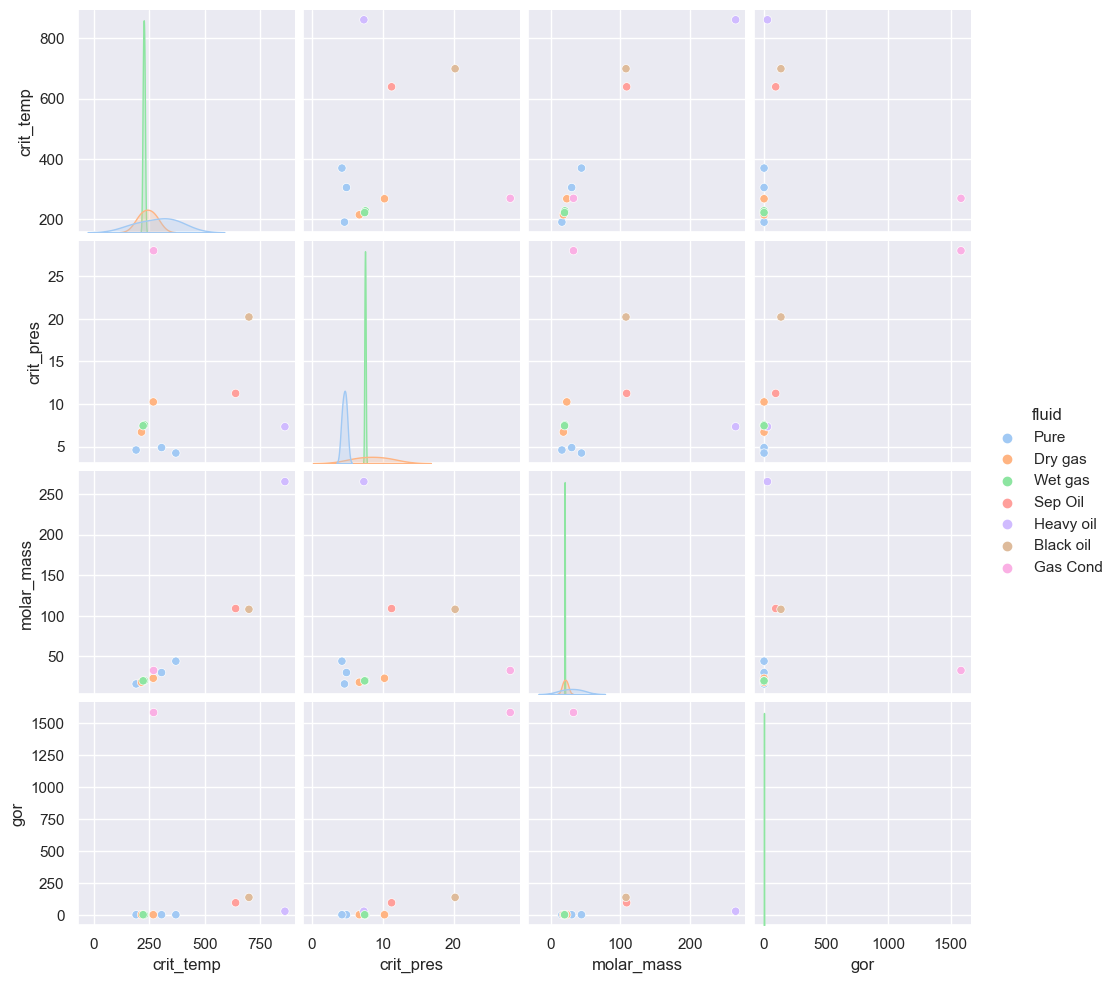

In [155]:
# pairwise relationships
sns.pairplot(fluids, hue='fluid')

# Expanding dataset with synthetic data

In [156]:
# there are two variants:
# 1) using SMOTE or GNN but it require at least some data not 11 examples
# 2) some of features can be limited in some edges for common fluids

# Data preprocessing for clustering

In [157]:
# choose only needed columns
experiments = raw_data[['fluid', 'observed_temp', 'observed_pres']]

experiments

,fluid,observed_temp,observed_pres
1,Pure,423.15,99.999932
2,Pure,393.15,89.127627
3,Pure,373.15,81.801254
4,Pure,353.15,74.406412
5,Pure,333.15,66.937197
...,...,...,...
12146,Wet gas,313.15,22.858235
12147,Wet gas,293.15,19.293268
12148,Wet gas,273.15,15.675815
12149,Wet gas,263.15,13.84561


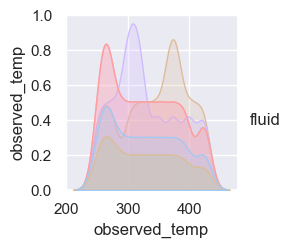

In [158]:
# why 1x1 when should be 2x2?
sns.pairplot(experiments, hue='fluid')

In [159]:
# find unusual value 'Liquid'
# check it later
experiments = experiments.replace('Liquid', 0)

experiments

,fluid,observed_temp,observed_pres
1,Pure,423.15,99.999932
2,Pure,393.15,89.127627
3,Pure,373.15,81.801254
4,Pure,353.15,74.406412
5,Pure,333.15,66.937197
...,...,...,...
12146,Wet gas,313.15,22.858235
12147,Wet gas,293.15,19.293268
12148,Wet gas,273.15,15.675815
12149,Wet gas,263.15,13.845610


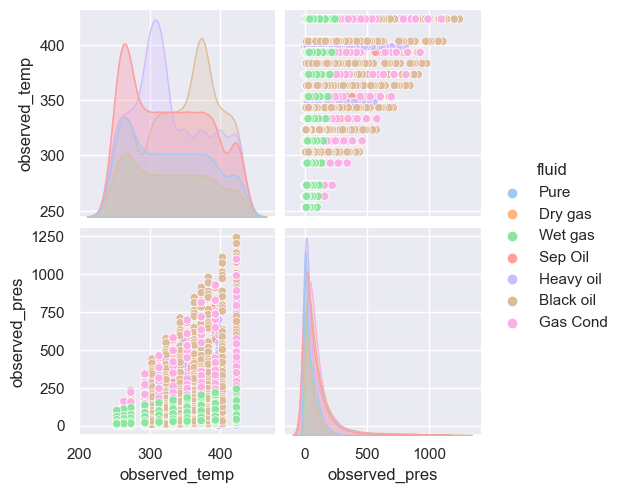

In [160]:
sns.pairplot(experiments, hue='fluid')

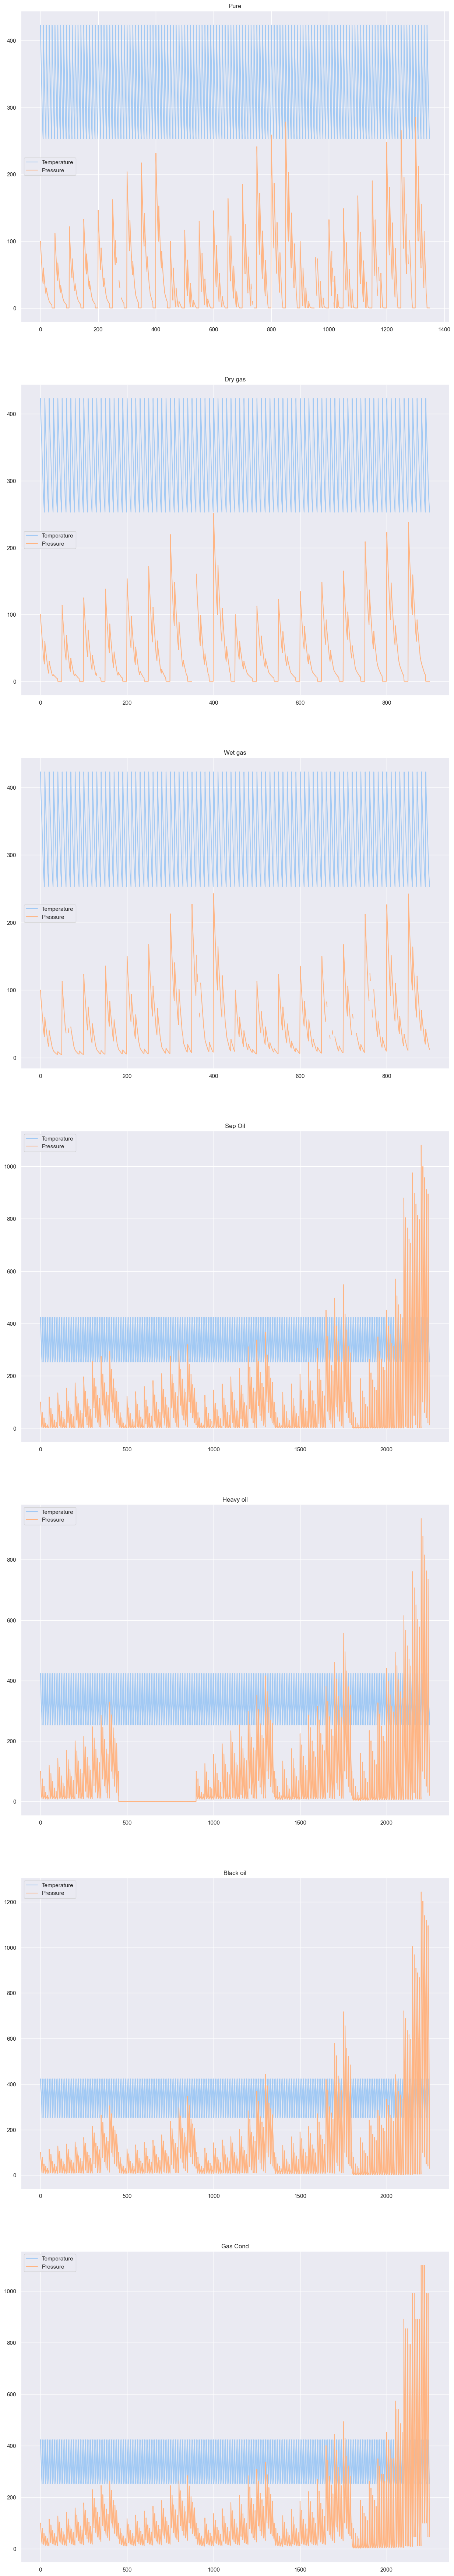

In [161]:
# see cyclicity of data
# amount of experiments may be more than 11
fig, ax = plt.subplots(len(experiments['fluid'].unique()), figsize=(15, 90))

for index, example in enumerate(experiments['fluid'].unique()):
    ax[index].set_title(example)
    example = experiments[experiments.fluid == example]
    l1, = ax[index].plot([_ for _ in range(len(example))], example['observed_temp'])
    l2, = ax[index].plot([_ for _ in range(len(example))], example['observed_pres'])
    ax[index].legend((l1, l2), ('Temperature', 'Pressure'))
    